<a href="https://colab.research.google.com/github/Abhishek315-a/machine-larning-models/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ReLU, PReLU, Dense, Dropout
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.layers import Dropout

In [4]:
dataset = pd.read_csv("Churn_Modelling.csv")
print(dataset.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [5]:
dataset.shape

(10000, 14)

In [6]:
X = dataset.iloc[:,3:13]

In [7]:
y = dataset.iloc[:,13]

In [8]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [9]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [10]:
from sklearn.preprocessing import LabelEncoder
lb_geo = LabelEncoder()
lb_gen = LabelEncoder()
X['Geography']= lb_geo.fit_transform(X['Geography'])
X['Gender'] = lb_gen.fit_transform(X['Gender'])

In [11]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [12]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled =scalar.fit_transform(X)

In [22]:
X_scaled.shape

(10000, 10)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [24]:
classifier = Sequential()

In [25]:
classifier.add(Dense(units=10,activation='relu'))
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))

In [26]:
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
early_stopping= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [58]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33, epochs=100,batch_size=10,callbacks=early_stopping)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8713 - loss: 0.3113 - val_accuracy: 0.8489 - val_loss: 0.3592
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8649 - loss: 0.3315 - val_accuracy: 0.8508 - val_loss: 0.3602
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8664 - loss: 0.3191 - val_accuracy: 0.8501 - val_loss: 0.3649
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8581 - loss: 0.3453 - val_accuracy: 0.8504 - val_loss: 0.3601
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8681 - loss: 0.3257 - val_accuracy: 0.8519 - val_loss: 0.3612
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8683 - loss: 0.3297 - val_accuracy: 0.8501 - val_loss: 0.3604
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8568 - loss: 0.3400 - val_accuracy: 0.8497 - val_loss: 0.3613
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8691 - loss: 0.3177 - val_accu

In [59]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

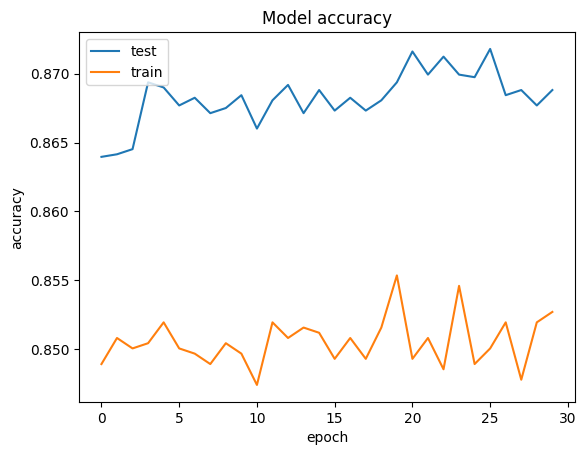

In [60]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model accuracy")
plt.xlabel("epoch")
plt.ylabel('accuracy')
plt.legend(['test','train'],loc='upper left')
plt.show()

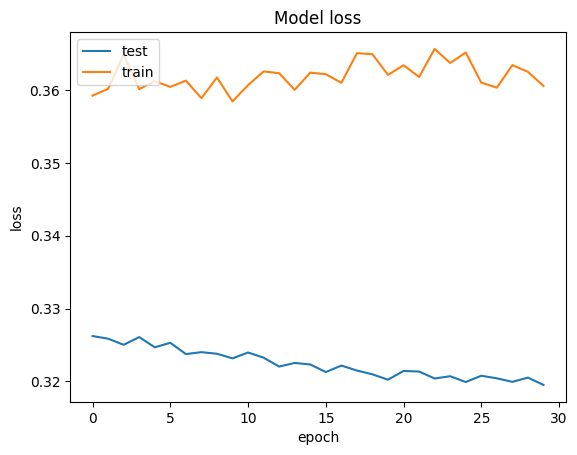

In [61]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model loss")
plt.xlabel("epoch")
plt.ylabel('loss')
plt.legend(['test','train'],loc='upper left')
plt.show()

In [62]:
y_pred = classifier.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [63]:
y_pred = (y_pred>=0.5)

In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

In [65]:
cm,accuracy

(array([[1538,   69],
        [ 210,  183]]),
 0.8605)

In [66]:
classifier.get_weights()

[array([[ 6.05168752e-02,  2.44812407e-02, -2.78397352e-01,
          2.46050358e-01,  5.07033765e-01, -6.27167523e-02,
         -8.41070786e-02, -2.29324475e-01, -3.00028436e-02,
          1.39796769e-03],
        [-3.00996482e-01,  5.62755108e-01,  1.46066666e-01,
          5.37936628e-01, -3.86398852e-01,  2.17838407e-01,
         -1.33197141e+00, -4.21229482e-01, -2.34604031e-01,
         -5.35550863e-02],
        [ 3.09190214e-01, -8.78710765e-03,  3.77788156e-01,
          4.29749250e-01,  7.68485844e-01,  7.01720477e-04,
          1.66542619e-01,  3.99861187e-01, -6.64770156e-02,
         -8.75611603e-02],
        [ 2.94653386e-01,  8.25791597e-01, -4.59656775e-01,
          1.59753993e-01,  2.77541518e-01,  8.52161422e-02,
          3.04845452e-01, -8.32414106e-02,  6.37168705e-01,
         -7.54311204e-01],
        [-2.85111535e-02, -2.27433871e-02,  2.07710564e-01,
          8.73771459e-02,  1.62329242e-01, -1.72255114e-02,
          7.18814060e-02,  5.17637189e-03, -5.876194